In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Takeoff Configuration

In [2]:
S_to_ft = 1900 * 3.28084
M_tow = 165352.31
CL_max_to = 1.85
sigma_to = 1/1

In [3]:
to_coeff = 37.5/(sigma_to * CL_max_to)

In [4]:
T_W_ratio = np.arange(start=0.0, stop=0.9, step=0.1)

In [5]:
W_S_CL_max_to = (S_to_ft/to_coeff) * T_W_ratio

In [6]:
S_to_ft/to_coeff

307.52406933333333

In [7]:
W_S_CL_max_to

array([  0.        ,  30.75240693,  61.50481387,  92.2572208 ,
       123.00962773, 153.76203467, 184.5144416 , 215.26684853,
       246.01925547])

Text(0, 0.5, 'Thrust to Weight ratio )T/W) [lb/lb]')

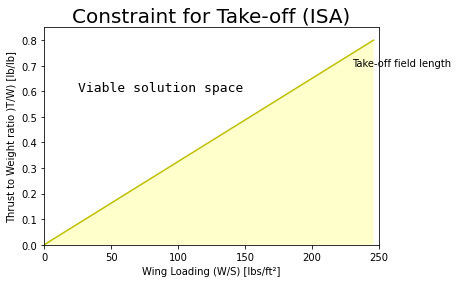

In [8]:
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', label='Takeoff field length')
plt.text(230, 0.7, "Take-off field length", fontsize=10)
plt.text(25, 0.6, "Viable solution space", family="monospace", fontsize=13)
plt.fill_between(W_S_CL_max_to, T_W_ratio, fc='yellow', alpha=0.2)
plt.xlim(0,250)
plt.ylim(0, 0.85)
plt.title("Constraint for Take-off (ISA)", fontsize=20)
plt.xlabel("Wing Loading (W/S) [lbs/ft²]")
plt.ylabel("Thrust to Weight ratio )T/W) [lb/lb]")

In [9]:
# Plot for various CLs
W_S_CL_12 = (S_to_ft/(37.5/(sigma_to * 1.2))) * T_W_ratio
W_S_CL_16 = (S_to_ft/(37.5/(sigma_to * 1.6))) * T_W_ratio
W_S_CL_18 = (S_to_ft/(37.5/(sigma_to * 1.8))) * T_W_ratio
W_S_CL_20 = (S_to_ft/(37.5/(sigma_to * 2.0))) * T_W_ratio
W_S_CL_24 = (S_to_ft/(37.5/(sigma_to * 2.4))) * T_W_ratio

In [10]:
W_S_CL_24

array([  0.       ,  39.8950144,  79.7900288, 119.6850432, 159.5800576,
       199.475072 , 239.3700864, 279.2651008, 319.1601152])

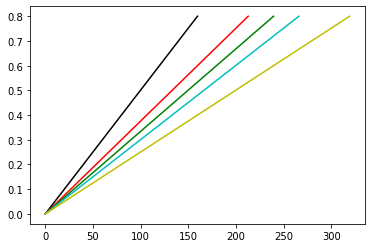

In [11]:
plt.plot(W_S_CL_12, T_W_ratio, 'k',
     W_S_CL_16, T_W_ratio, 'r',
     W_S_CL_18, T_W_ratio, 'g',
     W_S_CL_20, T_W_ratio, 'c',
     W_S_CL_24, T_W_ratio, 'y'
)
# ax.legend('Wing Loading Cl = 1.2', 'Wing Loading Cl = 1.6', 'Wing Loading Cl = 1.8', 'Wing Loading Cl = 2.0', 'Wing Loading Cl = 2.4')

## Landing Configuration

In [12]:
S_l_ft = 1500 * 3.28084
M_lw = 129112.66
sigma_l = 1
rho = 0.002376892
CL_max_l = 2.42

In [13]:
V_A = (S_l_ft/0.3) ** 0.5

In [14]:
V_sl = V_A / 1.3

In [15]:
V_sl_fts = V_sl * 1.68781

In [16]:
V_sl_fts

166.28678287210562

In [17]:
W_S_l = (V_sl_fts ** 2) * (rho * sigma_l * CL_max_l) / 2

In [18]:
W_S_l

79.52620924716427

In [19]:
W_S_l_CL_12 = (V_sl_fts ** 2) * (rho * sigma_l * 1.2) / 2 * (M_tow/M_lw)
W_S_l_CL_16 = (V_sl_fts ** 2) * (rho * sigma_l * 1.6) / 2 * (M_tow/M_lw)
W_S_l_CL_18 = (V_sl_fts ** 2) * (rho * sigma_l * 1.8) / 2 * (M_tow/M_lw)
W_S_l_CL_20 = (V_sl_fts ** 2) * (rho * sigma_l * 2.0) / 2 * (M_tow/M_lw)
W_S_l_CL_24 = (V_sl_fts ** 2) * (rho * sigma_l * 2.4) / 2 * (M_tow/M_lw)

In [20]:
W_S_l_CL_24

101.00609824825233

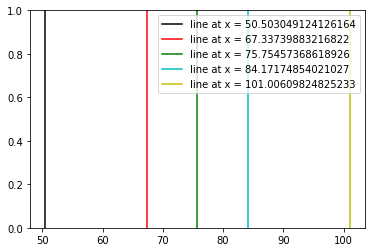

In [21]:
# x coordinates for the lines
xcoords = [W_S_l_CL_12, W_S_l_CL_16, W_S_l_CL_18, W_S_l_CL_20, W_S_l_CL_24]
# colors for the lines
colors = ['k','r','g', 'c', 'y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

plt.legend()
plt.show()

In [22]:
# Wing Loading Takeoff Condition
W_S_to_l = W_S_l * (M_tow/M_lw)

In [23]:
M_tow/M_lw

1.2806823900924975

In [24]:
W_S_to_l

101.84781573365441

Text(0, 0.5, 'Thrust to Weight ratio )T/W) [lb/lb]')

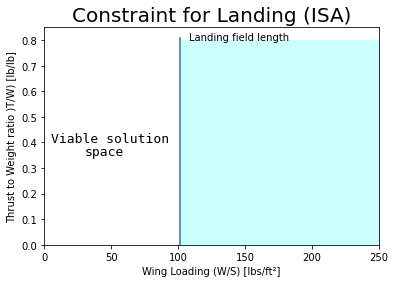

In [25]:
plt.axvline(W_S_to_l, 0, 0.95, label='Landing field length')
plt.text(108, 0.8, "Landing field length", fontsize=10)
plt.fill_betweenx(T_W_ratio, W_S_to_l, 250, fc='aqua', alpha=0.2)
plt.xlim(0,250)
plt.ylim(0, 0.85)
plt.text(5, 0.4, "Viable solution", family="monospace", fontsize=13)
plt.text(30, 0.35, "space", family="monospace", fontsize=13)
plt.title("Constraint for Landing (ISA)", fontsize=20)
plt.xlabel("Wing Loading (W/S) [lbs/ft²]")
plt.ylabel("Thrust to Weight ratio )T/W) [lb/lb]")

## Takeoff-Climb Gradient Requirements

In [26]:
CD_0_clean = 0.00825
AR = 9.5
e = 0.809
CL_max_clean = 1.25

In [27]:
K = 1/(math.pi*e*AR)
K

0.04141693919508044

### First Segment

In [28]:
CGR_1 = 0
CD_0_1 = CD_0_clean + 0.015 + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
# CD_0_1 = CD_0 + 0.015
e_1 = e - 0.05
k_1 = 1 / (math.pi * e_1 * AR)
CL_1 = CL_max_to / (1.04 ** 2)

In [29]:
print(CD_0_1, e_1)

0.03847303299105443 0.759


In [30]:
CD_1 = CD_0_1 + (k_1 * (CL_1 ** 2))

In [31]:
CD_1

0.1676231624172731

In [32]:
L_D_1 = (CL_1 / CD_1)
L_D_1

10.204013391806676

In [33]:
T_W_1 = 2 * (CGR_1 + (1 / L_D_1))
T_W_1

0.19600131077894334

### Second Segment

In [34]:
CGR_2 = 0.024
CD_0_2 = CD_0_clean + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
e_2 = e - 0.05
k_2 = 1 / (math.pi * e_2 * AR)
CL_2 = CL_max_to / (1.13 ** 2)

In [35]:
CD_2 = CD_0_2 + (k_2 * (CL_2 ** 2))
CD_2

0.11613775538074703

In [36]:
L_D_2 = (CL_2 / CD_2)
L_D_2

12.475024676443025

In [37]:
T_W_2 = 2 * (CGR_2 + (1 / L_D_2))
T_W_2

0.20832032415748736

### Final Segment

In [38]:
CGR_3 = 0.012
CD_0_3 = CD_0_clean
e_3 = e
k_3 = 1 / (math.pi * e_3 * AR)
CL_3 = CL_max_clean / (1.18 ** 2)

In [39]:
CD_3 = CD_0_3 + (k_3 * (CL_3 ** 2))
CD_3

0.0416287444994795

In [40]:
L_D_3 = (CL_3 / CD_3)
L_D_3

21.565160035349567

In [41]:
T_W_3 = 2 * (CGR_3 + (1 / L_D_3))
T_W_3

0.11674218214572041

### Landing AEO

In [42]:
CGR_4 = 0.032
CD_0_4 = CD_0_clean + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_4 = e - 0.1
k_4 = 1 / (math.pi * e_4 * AR)
CL_4 = CL_max_l / (1.13 ** 2)

In [43]:
CD_4 = CD_0_4 + (k_4 * (CL_4 ** 2))
CD_4

0.2786246599591262

In [44]:
L_D_4 = (CL_4 / CD_4)
L_D_4

6.802036022377242

In [45]:
T_W_4 = (CGR_4 + (1 / L_D_4))
T_W_4

0.17901480508339182

### Landing OEI

In [46]:
CGR_5 = 0.021
CD_0_5 = CD_0_clean + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_5 = e - 0.1
k_5 = 1 / (math.pi * e_5 * AR)
CL_5 = CL_max_l / (1.13 ** 2)

In [47]:
CD_5 = CD_0_5 + (k_5 * (CL_5 ** 2))
CD_5

0.2786246599591262

In [48]:
L_D_5 = (CL_5 / CD_5)
L_D_5

6.802036022377242

In [49]:
T_W_5 = 2 * (CGR_5 + (1 / L_D_5))
T_W_5

0.3360296101667836

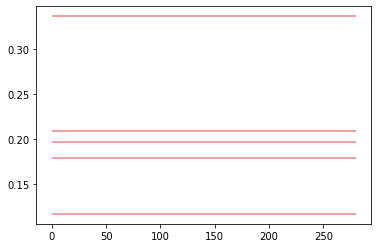

In [50]:
plt.hlines(T_W_1, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_2, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_3, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_4, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_5, 0, 280, colors='lightcoral', label='First Segment CGR')

## Rate of Climb

In [51]:
R_C = 300
tau = 0.218968565
M_cruisew = 146671.78
q = 172.8810082
W_S_cr = 52.63728618
S = 3042.840486 #WINGLD sheet
V_cr = 761.5776

In [52]:
M_cruisew / M_tow

0.8870258903549639

In [53]:
CL_RC = M_cruisew/(q * S)

In [54]:
CD_RC = CD_0_clean + K * (CL_RC ** 2)

In [55]:
CL_RC / CD_RC

24.30900891575379

In [67]:
T_W_h = (300/V_cr) + (CD_RC/CL_RC)
T_W_h

0.43505616123320384

In [68]:
T_W_cr = ((q * CD_0_clean) / W_S_cr) + ((K / q) * W_S_cr)

In [69]:
R_C_coeff = T_W_cr * W_S_cr * (1 / tau)

In [70]:
W_S_rc = np.arange(start=15, stop=280, step=0.1)

In [71]:
T_W_rc = (R_C_coeff/W_S_rc) * (5/4)
T_W_rc

array([0.79541038, 0.79014276, 0.78494445, ..., 0.04265697, 0.04264173,
       0.04262649])

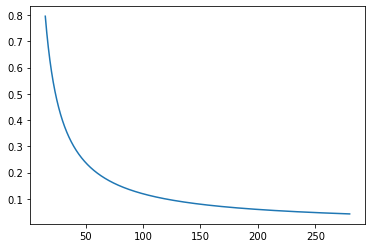

In [72]:
plt.plot(W_S_rc, T_W_rc)
# plt.hlines(T_W_h, 0, 280)

In [85]:
T_W_rc

array([0.79541038, 0.79014276, 0.78494445, ..., 0.04265697, 0.04264173,
       0.04262649])

# Combine for C-Diagram

Text(33, 0.6, 'Viable solution space')

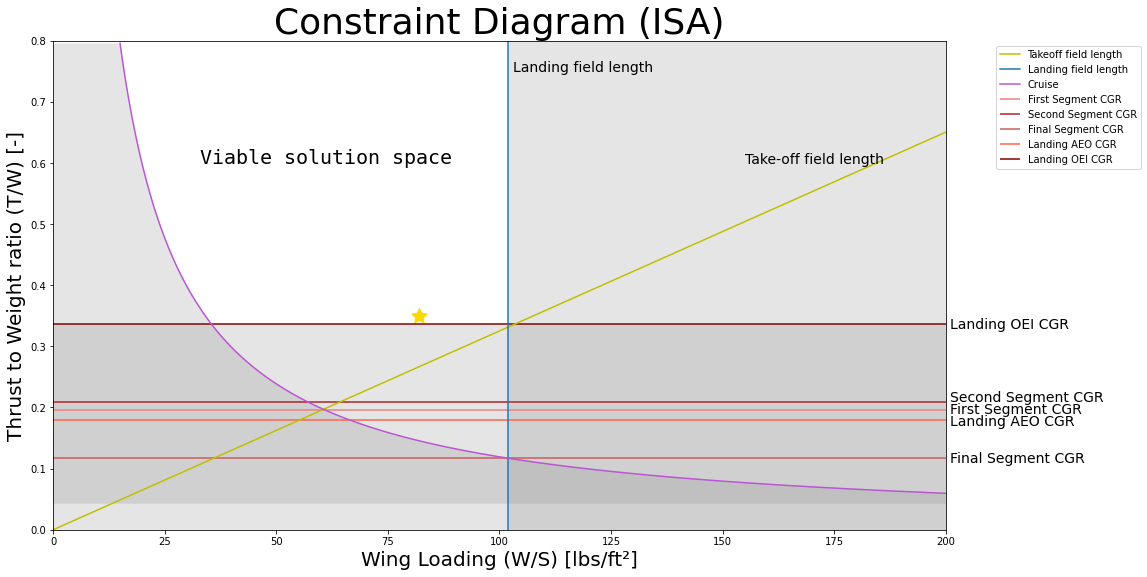

In [110]:
plt.figure(figsize=(16,9))

# Takeoff field length
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', label='Takeoff field length')
plt.text(155, 0.6, "Take-off field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_CL_24, fc='yellow', alpha=0.2)

# Landing field length
plt.axvline(W_S_to_l, 0, 1, label='Landing field length')
plt.text(103, 0.75, "Landing field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, fc='aqua', alpha=0.2)

# Takeoff Climb Gradient
## First Segment
plt.hlines(T_W_1, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.text(201, 0.19, "First Segment CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_1, 0.75, fc='lightcoral', alpha=0.2)
## Second Segment
plt.hlines(T_W_2, 0, 280, colors='firebrick', label='Second Segment CGR')
plt.text(201, 0.21, "Second Segment CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_2, 0.75, fc='firebrick', alpha=0.2)
## Final Segment
plt.hlines(T_W_3, 0, 280, colors='indianred', label='Final Segment CGR')
plt.text(201, 0.11, "Final Segment CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_3, 0.75, fc='indianred', alpha=0.2)
## Landing AEO
plt.hlines(T_W_4, 0, 280, colors='tomato', label='Landing AEO CGR')
plt.text(201, 0.17, "Landing AEO CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_4, 0.75, fc='tomato', alpha=0.2)
## Landing OEI
plt.hlines(T_W_5, 0, 280, colors='maroon', label='Landing OEI CGR')
plt.text(201, 0.33, "Landing OEI CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_5, 0.75, fc='maroon', alpha=0.2)

# Rate of Climb
# plt.hlines(T_W_h, 0, 280, colors='indigo', label = 'Rate of Climb')
# plt.text(220, 0.445, "Rate of Climb", fontsize=10)
plt.plot(W_S_rc, T_W_rc, 'mediumorchid', label='Cruise')
# plt.fill_betweenx(T_W_rc, W_S_rc, 280, fc='darkorchid', alpha=0.2)

# Design Point
plt.scatter(82, 0.35, s=250, color='gold',marker=(5, 1))

plt.fill_betweenx(T_W_ratio, W_S_to_l, 280, fc='grey', alpha=0.2)
plt.fill_between(W_S_CL_max_to, T_W_5, fc='grey', alpha=0.2)
plt.fill_betweenx(T_W_rc, W_S_rc, fc='grey', alpha=0.2)
plt.title("Constraint Diagram (ISA)", fontsize=36)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 200)
plt.ylim(0, 0.8)
plt.xlabel("Wing Loading (W/S) [lbs/ft²]", fontsize=20)
plt.ylabel("Thrust to Weight ratio (T/W) [-]", fontsize=20)
plt.text(33, 0.6, "Viable solution space", family="monospace", fontsize=20)

Text(28, 0.6, 'Viable solution space')

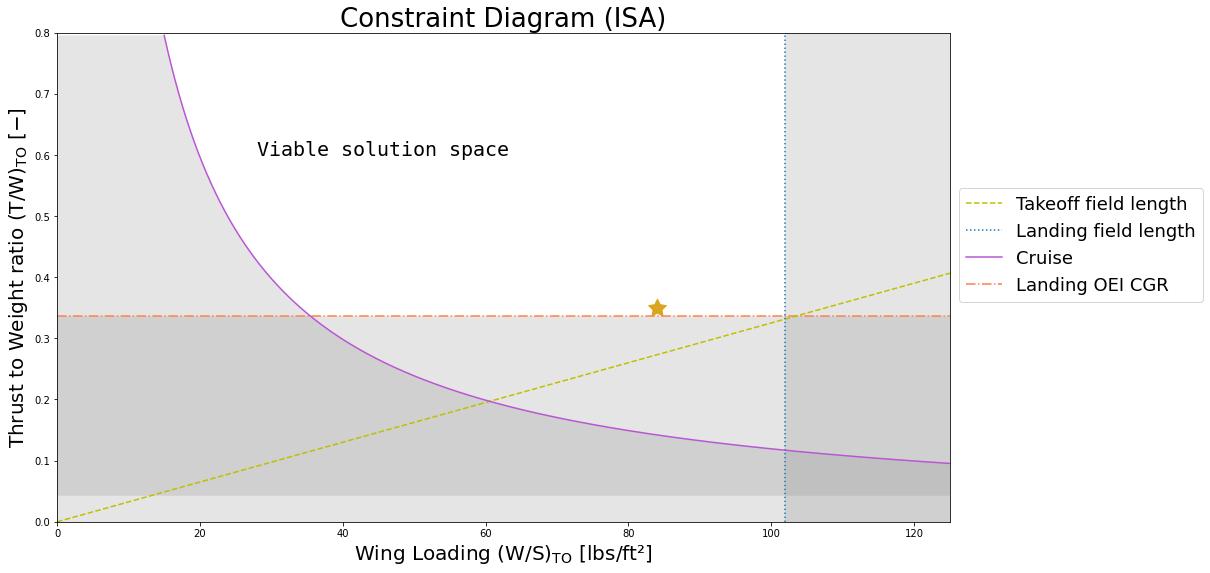

In [116]:
plt.figure(figsize=(16,9))

# Takeoff field length
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', linestyle='dashed', label='Takeoff field length')
# plt.text(155, 0.57, "Take-off field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_CL_24, fc='yellow', alpha=0.2)

# Landing field length
plt.axvline(W_S_to_l, 0, 1, linestyle=':', label='Landing field length')
# plt.text(87, 0.75, "Landing field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, fc='aqua', alpha=0.2)

# Takeoff Climb Gradient
# ## First Segment
# plt.hlines(T_W_1, 0, 280, colors='lightcoral', linestyle='-.', label='First Segment CGR')
# # plt.text(201, 0.19, "First Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_1, 0.75, fc='lightcoral', alpha=0.2)
# ## Second Segment
# plt.hlines(T_W_2, 0, 280, colors='firebrick', linestyle='-.', label='Second Segment CGR')
# # plt.text(201, 0.21, "Second Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_2, 0.75, fc='firebrick', alpha=0.2)
# ## Final Segment
# plt.hlines(T_W_3, 0, 280, colors='indianred', linestyle='-.', label='Final Segment CGR')
# # plt.text(201, 0.11, "Final Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_3, 0.75, fc='indianred', alpha=0.2)
# ## Landing AEO
# plt.hlines(T_W_4, 0, 280, colors='tomato', linestyle='-.', label='Landing AEO CGR')
# # plt.text(201, 0.17, "Landing AEO CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_4, 0.75, fc='tomato', alpha=0.2)
## Landing OEI
plt.hlines(T_W_5, 0, 280, colors='coral', linestyle='-.', label='Landing OEI CGR')
# plt.text(201, 0.33, "Landing OEI CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_5, 0.75, fc='maroon', alpha=0.2)

# Rate of Climb
# plt.hlines(T_W_h, 0, 280, colors='indigo', label = 'Rate of Climb')
# plt.text(220, 0.445, "Rate of Climb", fontsize=10)
plt.plot(W_S_rc, T_W_rc, 'mediumorchid', label='Cruise')
# plt.fill_betweenx(T_W_rc, W_S_rc, 280, fc='darkorchid', alpha=0.2)

# Design Point
plt.scatter(84, 0.35, s=350, color='goldenRod',marker=(5, 1))


plt.fill_betweenx(T_W_ratio, W_S_to_l, 280, fc='grey', alpha=0.2)
plt.fill_between(W_S_CL_max_to, T_W_5, fc='grey', alpha=0.2)
plt.fill_betweenx(T_W_rc, W_S_rc, fc='grey', alpha=0.2)
plt.title("Constraint Diagram (ISA)", fontsize=26)
plt.legend(bbox_to_anchor=(1, 0.7), loc='upper left', prop={'size':18})
plt.xlim(0, 125)
plt.ylim(0, 0.8)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.xlabel("$Wing\ Loading\ (W/S)_{TO}\ [lbs/ft²]$", fontsize=20)
plt.ylabel("$Thrust\ to\ Weight\ ratio\ (T/W)_{TO}\ [-]$", fontsize=20)
plt.text(28, 0.6, "Viable solution space", family="monospace", fontsize=20)